In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pywaffle
from pywaffle import Waffle

In [13]:
df = pd.read_csv('Fowler_Module3Charts - data.csv')
df.head()

,Name,Role,Mode of Transport,Department
0,John Smith,Student,Car,english
1,Jane Doe,Student,Bus,english
2,Michael Brown,Faculty,Walk,history
3,Emily Green,Staff,Bicycle,english
4,David White,Student,Car,history


In [14]:
df.shape

(89, 4)

In [15]:
df[['First', 'Last']] = df['Name'].str.split(' ', n=1, expand=True)
df.head()

,Name,Role,Mode of Transport,Department,First,Last
0,John Smith,Student,Car,english,John,Smith
1,Jane Doe,Student,Bus,english,Jane,Doe
2,Michael Brown,Faculty,Walk,history,Michael,Brown
3,Emily Green,Staff,Bicycle,english,Emily,Green
4,David White,Student,Car,history,David,White


In [16]:
df = df.drop(columns=['Name'])
df.head()

,Role,Mode of Transport,Department,First,Last
0,Student,Car,english,John,Smith
1,Student,Bus,english,Jane,Doe
2,Faculty,Walk,history,Michael,Brown
3,Staff,Bicycle,english,Emily,Green
4,Student,Car,history,David,White


In [17]:
import random

# Define possible values for each column
roles = ['Student', 'Faculty', 'Staff']
modes_of_transport = ['Car', 'Bus', 'Walk', 'Bicycle']
departments = ['english', 'history', 'science', 'mathematics']
first_names = ['John', 'Jane', 'Michael', 'Emily', 'David', 'Kayla', 'Roger', 'Tiffany', 'Terry', 'Deborah',
               'Chris', 'Pat', 'Alex', 'Jordan', 'Taylor', 'Morgan', 'Casey', 'Jamie', 'Robin', 'Dana',
               'Cameron', 'Avery', 'Riley', 'Skyler', 'Quinn', 'Reese', 'Peyton', 'Dakota', 'Bailey', 'Harper']
last_names = ['Smith', 'Doe', 'Brown', 'Green', 'White', 'Cook', 'Evans', 'Parker', 'Armstrong', 'Collins',
              'Johnson', 'Williams', 'Jones', 'Miller', 'Davis', 'Garcia', 'Rodriguez', 'Wilson', 'Martinez', 'Anderson',
              'Taylor', 'Thomas', 'Hernandez', 'Moore', 'Martin', 'Jackson', 'Thompson', 'Lopez', 'Lee', 'Gonzalez']

# Generate 140 rows of random data
new_data = {
    'Role': [random.choice(roles) for _ in range(140)],
    'Mode of Transport': [random.choice(modes_of_transport) for _ in range(140)],
    'Department': [random.choice(departments) for _ in range(140)],
    'First': [random.choice(first_names) for _ in range(140)],
    'Last': [random.choice(last_names) for _ in range(140)]
}

# Create a new DataFrame with the new data
new_df = pd.DataFrame(new_data)

# Concatenate the new data to the existing DataFrame
df = pd.concat([df, new_df], ignore_index=True)

# Save the updated DataFrame to the CSV file
df.to_csv('Fowler_Module3Charts.csv', index=False)

# Display the updated DataFrame
df.tail(150)

,Role,Mode of Transport,Department,First,Last
79,Student,Car,history,Ralph,Hill
80,Student,Bus,mathematics,Theresa,Green
81,Faculty,Walk,mathematics,Keith,Nelson
82,Student,Bicycle,arts,Monica,Adams
83,Student,Car,science,Jeremy,Perry
...,...,...,...,...,...
224,Staff,Walk,science,Skyler,Moore
225,Faculty,Walk,mathematics,Dakota,Taylor
226,Student,Bus,science,David,Moore
227,Student,Bus,mathematics,Terry,Cook


In [18]:
duplicate_rows = df[df.duplicated(subset=['First', 'Last'], keep=False)]
duplicate_rows

,Role,Mode of Transport,Department,First,Last
2,Faculty,Walk,history,Michael,Brown
103,Student,Car,science,Alex,Parker
106,Staff,Bus,history,Jordan,Doe
120,Faculty,Bicycle,history,Jordan,Collins
125,Faculty,Bicycle,history,Cameron,Cook
130,Staff,Bus,science,Kayla,Wilson
133,Faculty,Bicycle,history,Jordan,Doe
151,Faculty,Bus,history,Bailey,Thomas
152,Staff,Bus,science,Chris,Jones
160,Student,Walk,science,Chris,Jones


In [19]:
# Drop duplicate rows
df = df.drop_duplicates(subset=['First', 'Last'])

# Save the updated DataFrame to the CSV file
df.to_csv('Fowler_Module3Charts.csv', index=False)

# Display the updated DataFrame
df.head()

,Role,Mode of Transport,Department,First,Last
0,Student,Car,english,John,Smith
1,Student,Bus,english,Jane,Doe
2,Faculty,Walk,history,Michael,Brown
3,Staff,Bicycle,english,Emily,Green
4,Student,Car,history,David,White


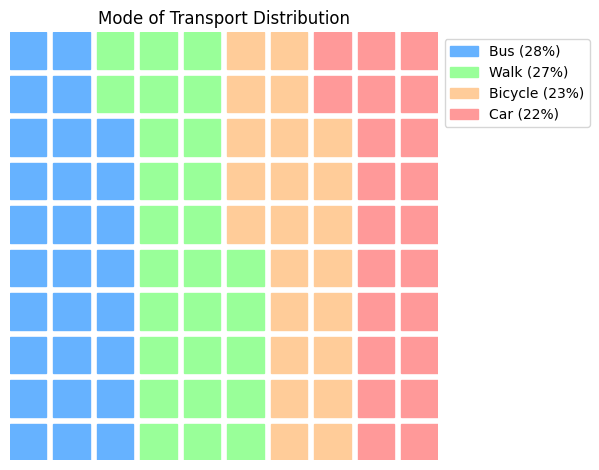

In [20]:
from pywaffle import Waffle

# Count the occurrences of each mode of transport
transport_counts = df['Mode of Transport'].value_counts()

# Calculate the percentages
total = transport_counts.sum()
transport_percentages = (transport_counts / total * 100).round().astype(int)

# Define the colors for each mode of transport
colors = {
    'Car': '#FF9999',
    'Bus': '#66B2FF',
    'Walk': '#99FF99',
    'Bicycle': '#FFCC99'
}

# Create the waffle chart
fig = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
    values=transport_percentages, 
    colors=[colors[key] for key in transport_percentages.index],
    legend={'labels': [f"{key} ({value}%)" for key, value in transport_percentages.items()], 'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    title={'label': 'Mode of Transport Distribution', 'loc': 'center'}
)

plt.show()

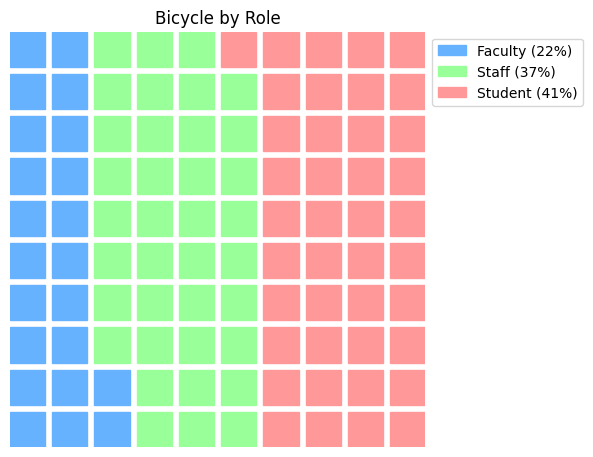

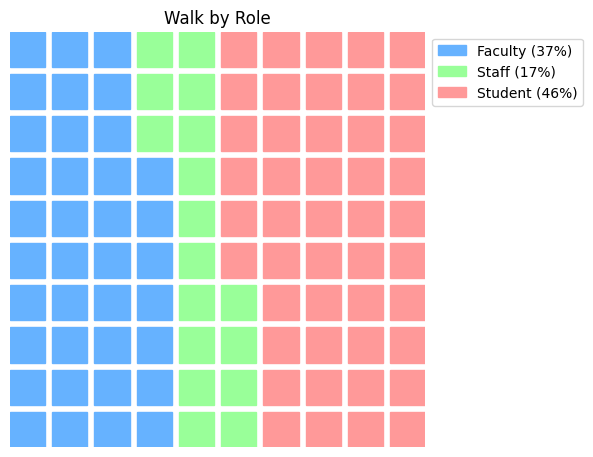

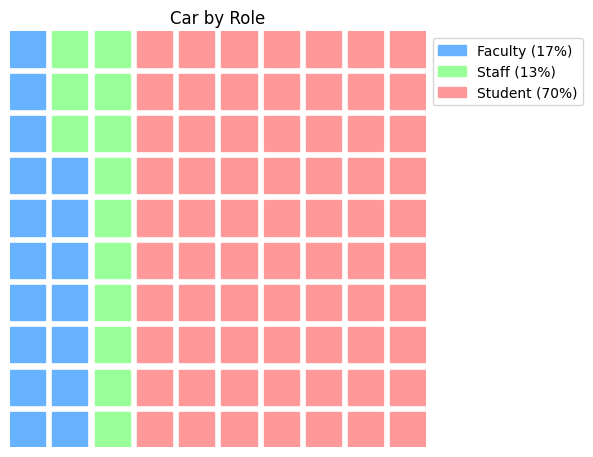

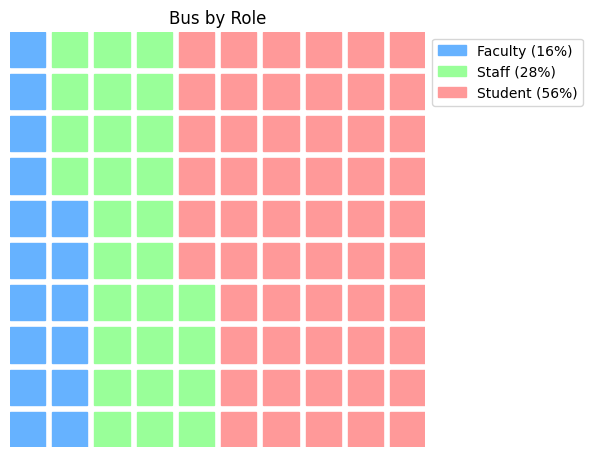

In [31]:
# Count the occurrences of each mode of transport by role
transport_role_counts = df.groupby(['Mode of Transport', 'Role']).size().unstack().fillna(0)

# Calculate the percentages
transport_role_percentages = (transport_role_counts.div(transport_role_counts.sum(axis=1), axis=0) * 100).round().astype(int)

# Define the colors for each role
role_colors = {
    'Student': '#FF9999',
    'Faculty': '#66B2FF',
    'Staff': '#99FF99'
}

# Create the waffle charts
fig1 = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
    values=transport_role_percentages.loc['Bicycle'], 
    colors=[role_colors[key] for key in transport_role_percentages.columns],
    legend={'labels': [f"{key} ({value}%)" for key, value in transport_role_percentages.loc['Bicycle'].items()], 'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    title={'label': 'Bicycle by Role', 'loc': 'center'},
    figsize=(6, 6)
)

fig2 = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
    values=transport_role_percentages.loc['Walk'], 
    colors=[role_colors[key] for key in transport_role_percentages.columns],
    legend={'labels': [f"{key} ({value}%)" for key, value in transport_role_percentages.loc['Walk'].items()], 'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    title={'label': 'Walk by Role', 'loc': 'center'},
    figsize=(6, 6)
)

fig3 = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
    values=transport_role_percentages.loc['Car'], 
    colors=[role_colors[key] for key in transport_role_percentages.columns],
    legend={'labels': [f"{key} ({value}%)" for key, value in transport_role_percentages.loc['Car'].items()], 'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    title={'label': 'Car by Role', 'loc': 'center'},
    figsize=(6, 6)
)

fig4 = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
    values=transport_role_percentages.loc['Bus'], 
    colors=[role_colors[key] for key in transport_role_percentages.columns],
    legend={'labels': [f"{key} ({value}%)" for key, value in transport_role_percentages.loc['Bus'].items()], 'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    title={'label': 'Bus by Role', 'loc': 'center'},
    figsize=(6, 6)
)

plt.show()